# Librerias

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from scipy import stats
import matplotlib as mpl
import scipy as sp
import sklearn.datasets as datasets
import math
import statistics 

# Dataset

In [2]:
cars=pd.read_csv('merc.csv')

In [3]:
cars.columns

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object')

In [4]:
cars.head()

model  year  price transmission  mileage fuelType  tax   mpg  \
0        SLK  2005   5200    Automatic    63000   Petrol  325  32.1   
1    S Class  2017  34948    Automatic    27000   Hybrid   20  61.4   
2   SL CLASS  2016  49948    Automatic     6200   Petrol  555  28.0   
3    G Class  2016  61948    Automatic    16000   Petrol  325  30.4   
4    G Class  2016  73948    Automatic     4000   Petrol  325  30.1   

   engineSize  
0         1.8  
1         2.1  
2         5.5  
3         4.0  
4         4.0

In [5]:
cars.model.value_counts()

 C Class      3747
 A Class      2561
 E Class      1953
 GLC Class     960
 GLA Class     847
 B Class       591
 CL Class      511
 GLE Class     461
 SL CLASS      260
 CLS Class     237
 V Class       207
 S Class       197
 GL Class      121
 SLK            95
 CLA Class      86
 X-CLASS        82
 M Class        79
 GLS Class      74
 GLB Class      19
 G Class        15
 CLK             7
 CLC Class       3
 R Class         2
220              1
180              1
200              1
230              1
Name: model, dtype: int64

In [6]:
cars.describe()

year          price        mileage           tax           mpg  \
count  13119.000000   13119.000000   13119.000000  13119.000000  13119.000000   
mean    2017.296288   24698.596920   21949.559037    129.972178     55.155843   
std        2.224709   11842.675542   21176.512267     65.260286     15.220082   
min     1970.000000     650.000000       1.000000      0.000000      1.100000   
25%     2016.000000   17450.000000    6097.500000    125.000000     45.600000   
50%     2018.000000   22480.000000   15189.000000    145.000000     56.500000   
75%     2019.000000   28980.000000   31779.500000    145.000000     64.200000   
max     2020.000000  159999.000000  259000.000000    580.000000    217.300000   

         engineSize  
count  13119.000000  
mean       2.071530  
std        0.572426  
min        0.000000  
25%        1.800000  
50%        2.000000  
75%        2.100000  
max        6.200000

In [7]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13119 entries, 0 to 13118
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         13119 non-null  object 
 1   year          13119 non-null  int64  
 2   price         13119 non-null  int64  
 3   transmission  13119 non-null  object 
 4   mileage       13119 non-null  int64  
 5   fuelType      13119 non-null  object 
 6   tax           13119 non-null  int64  
 7   mpg           13119 non-null  float64
 8   engineSize    13119 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 922.6+ KB


In [8]:
cars.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

# Observación General de las variables

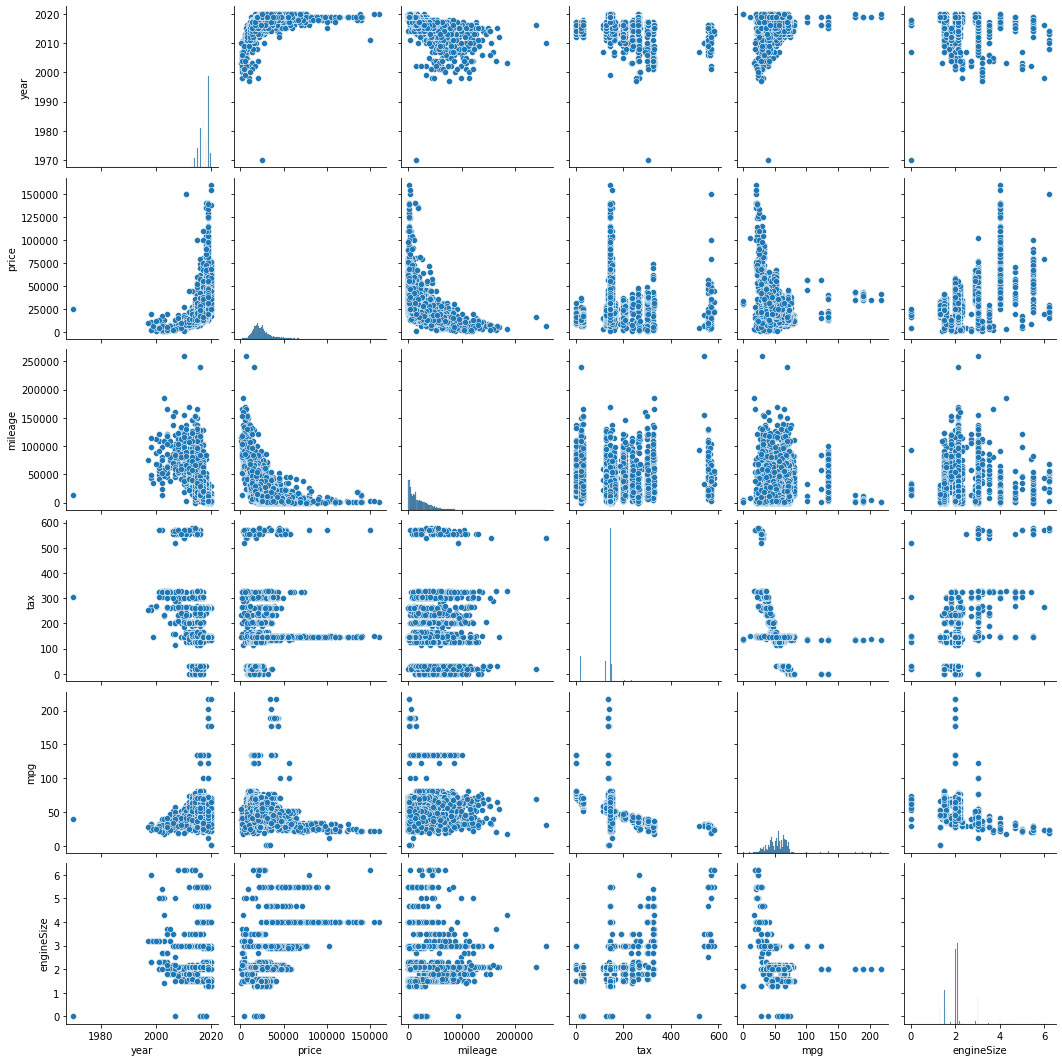

In [9]:
sns.pairplot(data=cars)

Text(0.5, 1.0, 'Price Count')

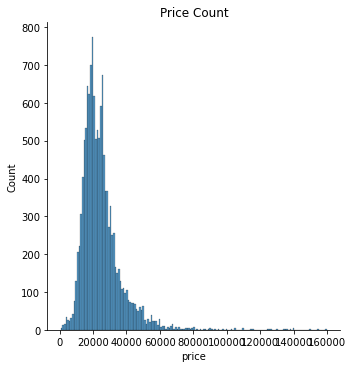

In [10]:
sns.displot(cars.price)
plt.title('Price Count')

Text(0.5, 1.0, 'Year count')

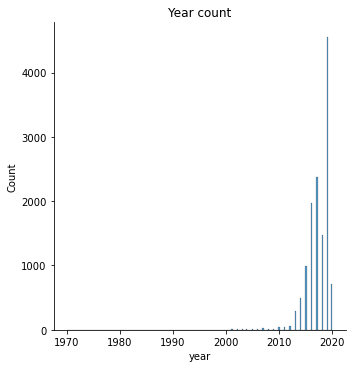

In [11]:
sns.displot(cars.year)
plt.title('Year count')

Text(0.5, 1.0, 'Mileage Count')

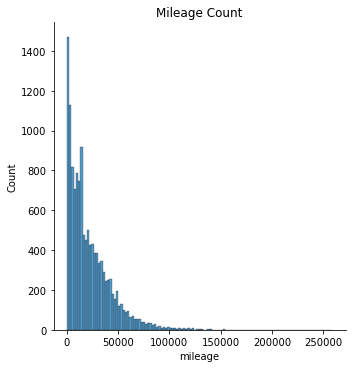

In [12]:
sns.displot(cars.mileage)
plt.title('Mileage Count')

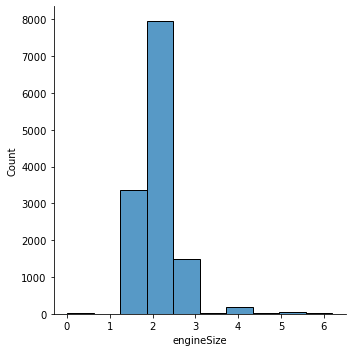

In [13]:
sns.displot(cars.engineSize,bins=10)

## Seleccionar los modelos a estudiar

In [14]:
model=cars[(cars['model']==' A Class') | (cars['model']==' E Class') | (cars['model']==' C Class')]

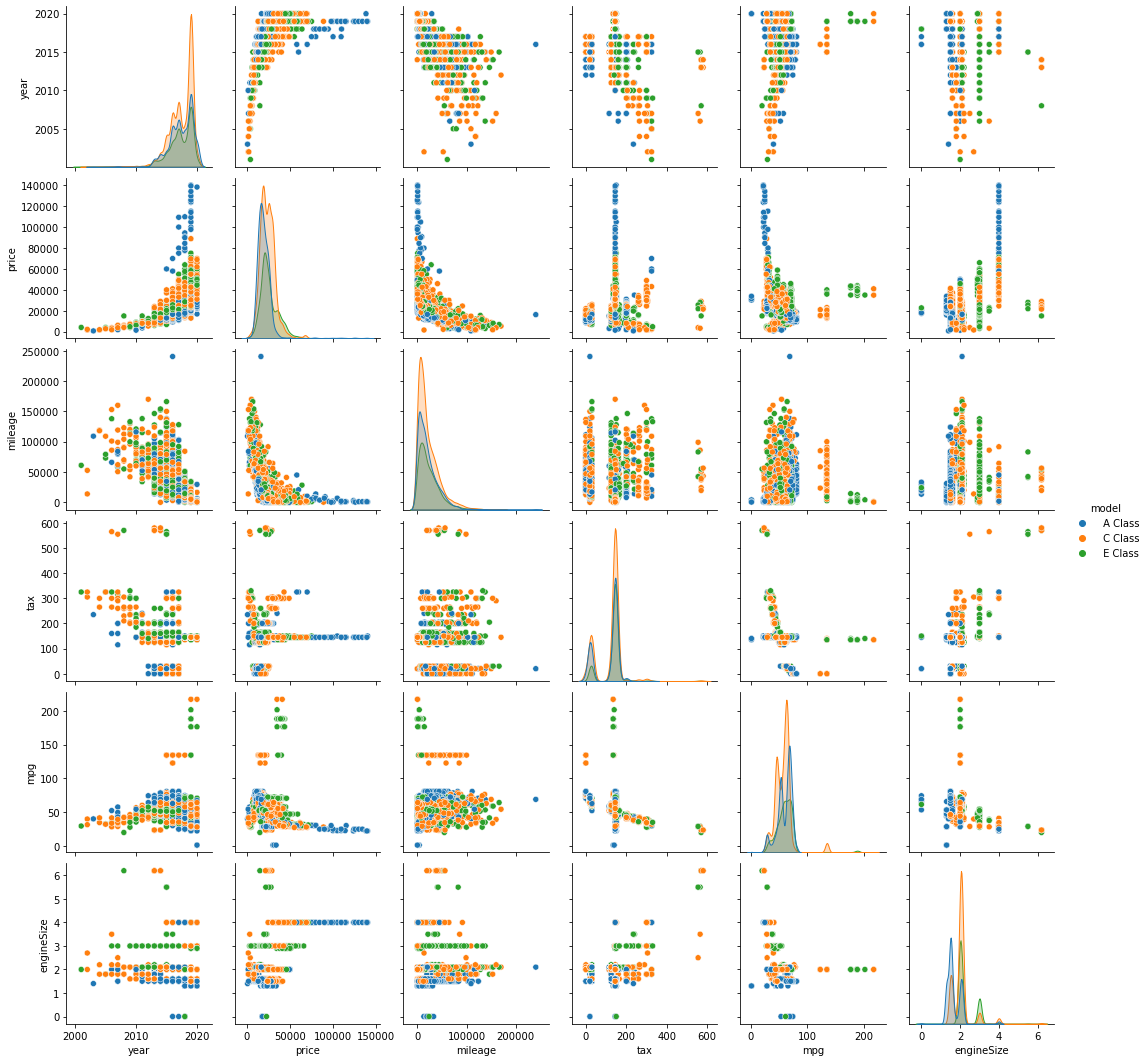

In [15]:
sns.pairplot(data=model, hue='model')

In [16]:
model_A=cars[(cars['model']==' A Class')]
model_E=cars[(cars['model']==' E Class')]
model_C=cars[(cars['model']==' C Class')]

### Compare model price by mean

In [17]:
model_A.price.describe()

count      2561.000000
mean      19849.597032
std       11183.557947
min         650.000000
25%       14750.000000
50%       18240.000000
75%       22990.000000
max      140319.000000
Name: price, dtype: float64

In [18]:
model_E.price.describe()

count     1953.000000
mean     25481.420891
std      10218.826193
min       2995.000000
25%      18991.000000
50%      22980.000000
75%      30999.000000
max      75099.000000
Name: price, dtype: float64

In [19]:
model_C.price.describe()

count     3747.000000
mean     23695.822258
std       8765.286722
min       1495.000000
25%      17784.000000
50%      22999.000000
75%      28883.500000
max      88995.000000
Name: price, dtype: float64

In [20]:
model_A.price.mean()>model_C.price.mean()

False

In [21]:
model_A.price.mean()>model_E.price.mean()

False

In [22]:
model_E.price.mean()>model_C.price.mean()

True

### Compare model price by Boxplots

<AxesSubplot:>

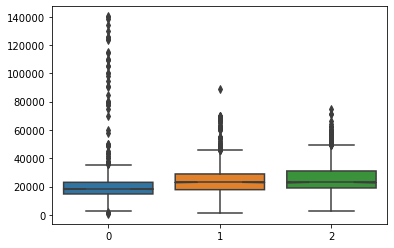

In [23]:
sns.boxplot(data=[model_A.price, model_C.price, model_E.price], notch=True)

<AxesSubplot:>

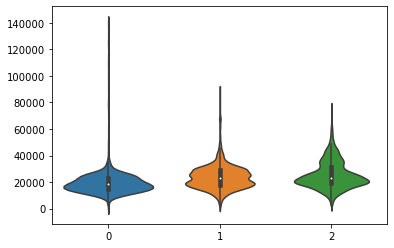

In [24]:
sns.violinplot(data=[model_A.price, model_C.price, model_E.price], notch=True)

### Compare model price by Displot

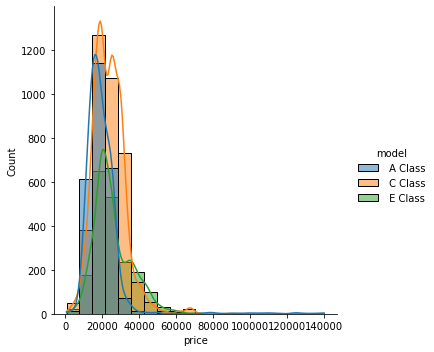

In [25]:
sns.displot(data=model,x='price',hue='model',kde=True, bins=20)

### Compare by T-Test

In [26]:
cars.head()

model  year  price transmission  mileage fuelType  tax   mpg  \
0        SLK  2005   5200    Automatic    63000   Petrol  325  32.1   
1    S Class  2017  34948    Automatic    27000   Hybrid   20  61.4   
2   SL CLASS  2016  49948    Automatic     6200   Petrol  555  28.0   
3    G Class  2016  61948    Automatic    16000   Petrol  325  30.4   
4    G Class  2016  73948    Automatic     4000   Petrol  325  30.1   

   engineSize  
0         1.8  
1         2.1  
2         5.5  
3         4.0  
4         4.0

In [27]:
def t_test_features(s1, s2, features=['price', 'mileage', 'mpg', 'engineSize']):
    """Test means of a feature set of two samples
    
    Args:
        s1 (dataframe): sample 1
        s2 (dataframe): sample 2
        features (list): an array of features to test
    
    Returns:
        dict: a dictionary of t-test scores for each feature where the feature name is the key and the p-value is the value
    """
    results = {}

    # Your code here
    for i in features:
        r=stats.ttest_ind(s1[i],s2[i])
        results[i]=r.pvalue
    return results

In [28]:
s1=cars[cars['model']== ' A Class']
s2=cars[cars['model']== ' C Class']
s3=cars[cars['model']== ' E Class']

In [29]:
t_test_features(s1,s2)

{'price': 8.996458335526244e-52,
 'mileage': 0.03551712532629413,
 'mpg': 3.5763256015391123e-09,
 'engineSize': 6.886373643724102e-215}

In [30]:
t_test_features(s1,s3)

{'price': 1.1884138374290098e-65,
 'mileage': 2.6116170132777776e-06,
 'mpg': 0.012856944496036705,
 'engineSize': 0.0}

In [31]:
t_test_features(s3,s2)

{'price': 6.2798380351144456e-12,
 'mileage': 0.003184009978496784,
 'mpg': 9.359469359902858e-13,
 'engineSize': 7.381487333509065e-66}

## Confidence Interval

* Confidence level of 80%

### Class A

* Confidence interval of prices under 20000$ 

In [34]:
sample_20000=model_A[model_A.price<20000].price

In [35]:
freedom_deg=len(sample_20000)-1
std=statistics.stdev(sample_20000)
mean=np.mean(sample_20000)

In [36]:
conf80=stats.t.interval(alpha=0.8,df=freedom_deg,loc=mean, scale=std)

In [37]:
conf80

(11410.266486175504, 19111.794994376567)

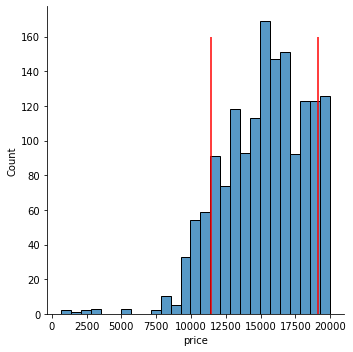

In [38]:
sns.displot(sample_20000)
plt.vlines([conf80[0],conf80[1]],0,160,color='red')

### Class E

* Confidence interval of prices under 20000$ 

In [43]:
sample_20000=model_E[model_E.price<20000].price

In [44]:
freedom_deg=len(sample_20000)-1
std=statistics.stdev(sample_20000)
mean=np.mean(sample_20000)

In [45]:
conf80=stats.t.interval(alpha=0.8,df=freedom_deg,loc=mean, scale=std)

In [46]:
conf80

(11523.422027269471, 20621.375537418506)

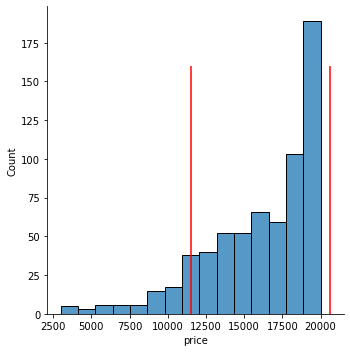

In [47]:
sns.displot(sample_20000)
plt.vlines([conf80[0],conf80[1]],0,160,color='red')

### Class C

* Confidence interval of prices under 20000$ 

In [52]:
sample_20000=model_C[model_C.price<20000].price

In [53]:
freedom_deg=len(sample_20000)-1
std=statistics.stdev(sample_20000)
mean=np.mean(sample_20000)

In [54]:
conf80=stats.t.interval(alpha=0.8,df=freedom_deg,loc=mean, scale=std)

In [55]:
conf80

(11308.06379099619, 20263.193153448257)

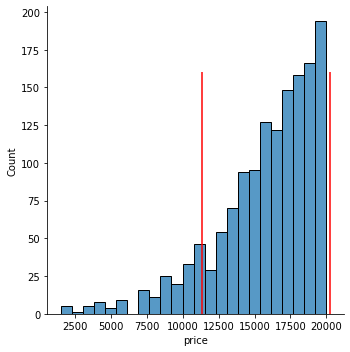

In [56]:
sns.displot(sample_20000)
plt.vlines([conf80[0],conf80[1]],0,160,color='red')

## Hypothesis Tests

I am intersted in buying a car, and i am capable of spending 20000$ and it is claimed that the average prices of cars are under 20000, so in this section we will test if this is true. We will test the 3 classes of mercedece using a 95% confidence interval

* The first model of mercedes that i thought about was Class A

In [59]:
r=stats.ttest_1samp(model_A['price'],20000,alternative='less')
print(r.pvalue)

0.2480984148398005


As we see the pvalue<0.05, that means that it would be difficulte to find a car, and we will have to search another model

* Let's see if we can buy a Class E

In [60]:
r=stats.ttest_1samp(model_E['price'],20000,alternative='less')
print(r.pvalue)

1.0


* Class C

In [61]:
r=stats.ttest_1samp(model_C['price'],20000,alternative='less')
print(r.pvalue)

1.0


As we can conclude, having less than 20000 won´t buy us any of those models of mercedez

I really need a car so i decided to increase it to 24000, as we see that class A isn´t that far

* Class A

In [62]:
r=stats.ttest_1samp(model_A['price'],24000,alternative='less')
print(r.pvalue)

3.969405950936037e-74


* Class E

In [63]:
r=stats.ttest_1samp(model_E['price'],24000,alternative='less')
print(r.pvalue)

0.999999999907014


* Class C

In [64]:
r=stats.ttest_1samp(model_C['price'],24000,alternative='less')
print(r.pvalue)

0.01685779190488054


As the results show, classe E still far for being accepted so i will just focus on class C an A, but as it seems i have more probability on finding a cheap class A mercedes 

# Segunda Observación 

So once we decided the model of car taht we will focus our search, now we will observate the other variables

In [65]:
model_A.head()

model  year  price transmission  mileage fuelType  tax   mpg  \
10   A Class  2020  32980    Automatic      606   Petrol  145  35.8   
11   A Class  2020  26980    Automatic     1000   Diesel  145  62.8   
33   A Class  2020  28128    Automatic     2563   Petrol  145  47.9   
34   A Class  2019  23184       Manual     1173   Petrol  145  44.8   
35   A Class  2017  15787    Automatic    24092   Diesel   20  70.6   

    engineSize  
10         2.0  
11         1.5  
33         1.3  
34         1.3  
35         2.1

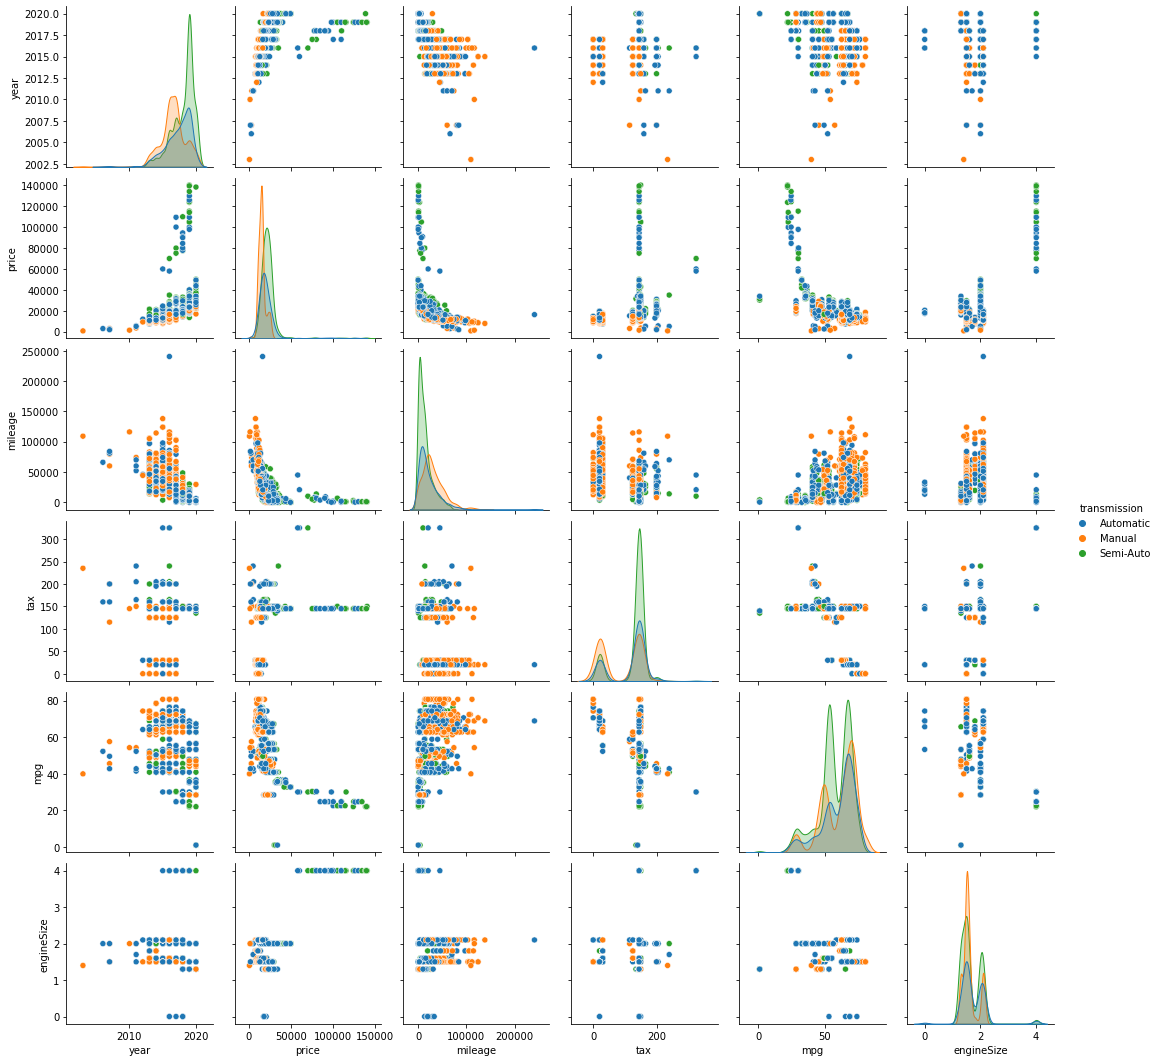

In [66]:
sns.pairplot(data=model_A, hue='transmission')

## Correlation

We will start observating the correlation of the dfferent varaibles 

In [67]:
model_A.corr(method='spearman')

year     price   mileage       tax       mpg  engineSize
year        1.000000  0.847703 -0.854789  0.546481 -0.388005   -0.459642
price       0.847703  1.000000 -0.859881  0.577477 -0.548532   -0.269953
mileage    -0.854789 -0.859881  1.000000 -0.510098  0.452152    0.389379
tax         0.546481  0.577477 -0.510098  1.000000 -0.530415   -0.173039
mpg        -0.388005 -0.548532  0.452152 -0.530415  1.000000    0.062421
engineSize -0.459642 -0.269953  0.389379 -0.173039  0.062421    1.000000

In [68]:
model_A.corr(method='kendall')

year     price   mileage       tax       mpg  engineSize
year        1.000000  0.711629 -0.698147  0.435601 -0.289304   -0.370116
price       0.711629  1.000000 -0.678023  0.435821 -0.399001   -0.209135
mileage    -0.698147 -0.678023  1.000000 -0.376506  0.314512    0.295150
tax         0.435601  0.435821 -0.376506  1.000000 -0.445195   -0.143058
mpg        -0.289304 -0.399001  0.314512 -0.445195  1.000000    0.042656
engineSize -0.370116 -0.209135  0.295150 -0.143058  0.042656    1.000000

In [69]:
model_A.corr(method='pearson')

year     price   mileage       tax       mpg  engineSize
year        1.000000  0.448336 -0.756014  0.568520 -0.322532   -0.222100
price       0.448336  1.000000 -0.444328  0.358607 -0.511517    0.511764
mileage    -0.756014 -0.444328  1.000000 -0.587871  0.367526    0.158660
tax         0.568520  0.358607 -0.587871  1.000000 -0.529309   -0.085274
mpg        -0.322532 -0.511517  0.367526 -0.529309  1.000000   -0.139693
engineSize -0.222100  0.511764  0.158660 -0.085274 -0.139693    1.000000

<AxesSubplot:xlabel='year', ylabel='price'>

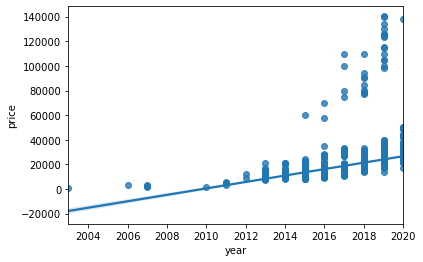

In [70]:
sns.regplot(y='price',x='year',data=model_A)

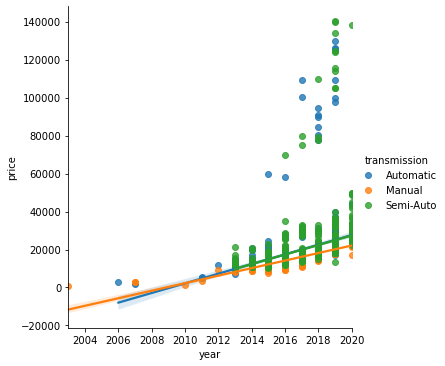

In [71]:
sns.lmplot(y='price',x='year',data=model_A, hue='transmission')

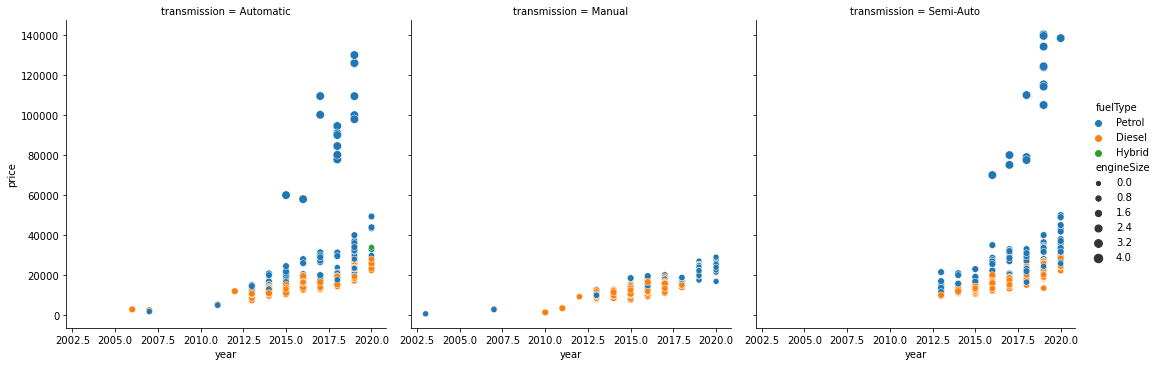

In [72]:
sns.relplot(x='year', y='price', hue='fuelType', col='transmission', size='engineSize', data=model_A)

In [73]:
len(model_A[model_A.transmission=='Automatic'])

678

In [74]:
len(model_A[model_A.transmission=='Manual'])

799

In [75]:
len(model_A[model_A.transmission=='Semi-Auto'])

1084

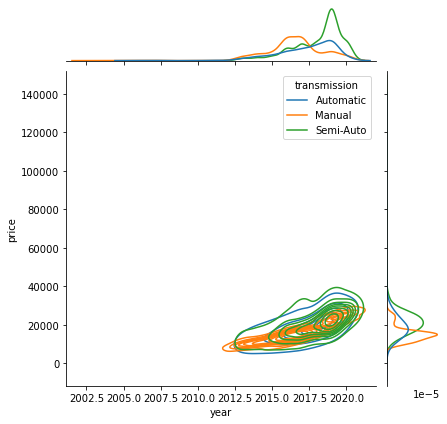

In [76]:

jp = sns.jointplot(x="year", y="price", data=model_A, kind='kde',hue='transmission')

In [77]:
#Pivot
fp=model_A.pivot_table(index='transmission', columns='year', values='price')

<AxesSubplot:xlabel='year', ylabel='transmission'>

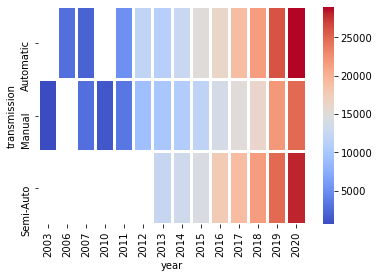

In [78]:
sns.heatmap(fp,cmap='coolwarm',linecolor='white',linewidths=2)

OObservando las anteriores gráficas podemos afirmar que el precio presenta un comportamiento directamente proporcional con los años

En cuanto a los valores que no siguen este comportamiento, logramos ver que presentan características similares y todos comparten aroxiamdamente el tamaño del engine

Text(0, 0.5, 'Price')

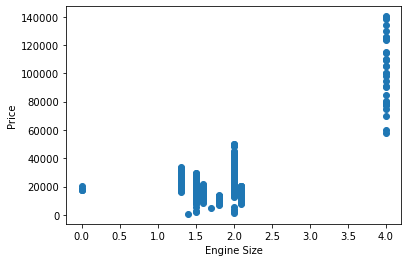

In [79]:
plt.scatter(x='engineSize',y='price',data=model_A)
plt.xlabel('Engine Size')
plt.ylabel('Price')

A partir de esta grafica podemos ver que los valores que hemos considerado 'outliers' pertenecen realmente a un grupo selecto que son los que tienen un engine size = 4. Entonces para estudiar mejor la evolución de los precios excluiremos a este grupo

In [80]:
model_slctA=model_A[model_A.engineSize!=4.0]

In [81]:
model_slctA.corr(method='pearson')

year     price   mileage       tax       mpg  engineSize
year        1.000000  0.782008 -0.756042  0.576351 -0.323199   -0.340372
price       0.782008  1.000000 -0.720028  0.571580 -0.543224   -0.105634
mileage    -0.756042 -0.720028  1.000000 -0.591680  0.359306    0.291259
tax         0.576351  0.571580 -0.591680  1.000000 -0.529871   -0.205586
mpg        -0.323199 -0.543224  0.359306 -0.529871  1.000000    0.077096
engineSize -0.340372 -0.105634  0.291259 -0.205586  0.077096    1.000000

<AxesSubplot:>

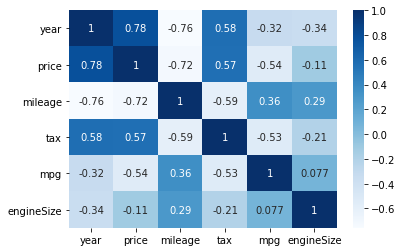

In [82]:
sns.heatmap(model_slctA.corr(),annot=True,cmap='Blues')

<AxesSubplot:xlabel='year', ylabel='price'>

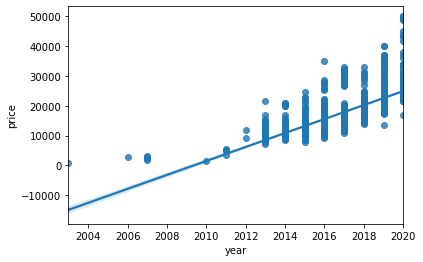

In [83]:
sns.regplot(y='price',x='year',data=model_slctA)

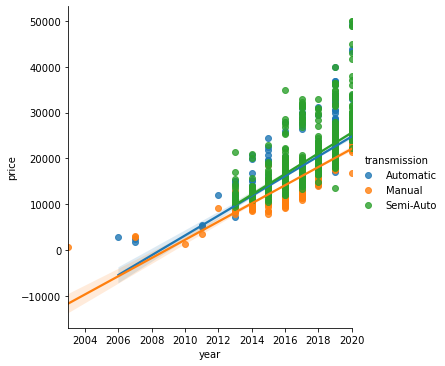

In [234]:
sns.lmplot(y='price',x='year',data=model_slctA, hue='transmission')

In [235]:
g1=model_slctA[model_slctA['transmission']=='Automatic']
g2=model_slctA[model_slctA['transmission']=='Manual']
g3=model_slctA[model_slctA['transmission']=='Semi-Auto']

In [85]:
stats.linregress(model_slctA.year,model_slctA.price)

LinregressResult(slope=2340.317401222951, intercept=-4702538.26036081, rvalue=0.7820082034722299, pvalue=0.0, stderr=37.10528371439544, intercept_stderr=74856.09247487898)

In [236]:
stats.linregress(g1.year,g1.price)

LinregressResult(slope=2156.859349276552, intercept=-4332052.921649581, rvalue=0.7458449001977909, pvalue=1.4565121579576943e-118, stderr=74.98140545151863, intercept_stderr=151259.6531507962)

In [237]:
stats.linregress(g2.year,g2.price)

LinregressResult(slope=1983.7740051513802, intercept=-3985103.085026253, rvalue=0.8690026598890424, pvalue=9.49571515857319e-246, stderr=40.01088218354517, intercept_stderr=80683.50611961)

In [238]:
stats.linregress(g3.year,g3.price)

LinregressResult(slope=2251.976653819174, intercept=-4523345.166881449, rvalue=0.6883150300113953, pvalue=8.570059675265024e-151, stderr=72.69134458876631, intercept_stderr=146698.53226839725)

Como podemos ver en la grafica anterior, la regresión pasa a ser más exacta y puede explicarnos mejor la evolución de los precios a lo largo de los años.

### Model

In [301]:
X=model_slctA.year.values
y=model_slctA.price.values

In [302]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

In [303]:
X_train= X_train.reshape(-1, 1)
y_train= y_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

In [304]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()

In [305]:
model.fit(X_train, y_train)
model.score(X_train, y_train)

0.6162025938164141

In [306]:
model.score(X_test, y_test)

0.5918943726059149

In [307]:
y_pred = model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
rmse

3629.576372759867

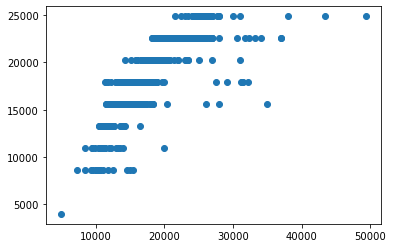

In [308]:
plt.scatter(x=y_test, y=y_pred)

In [328]:
pr=model_slctA

In [ ]:
pr['pred']=y_pred

In [ ]:
sns.boxplot()

In [ ]:
sns.lmplot(y='pred',x='year',data=model_slctA, hue='transmission')

In [ ]:
sns.boxplot(data=[model_slctA.price,model_slctA.pred], notch=True)

In [334]:
Manual=model_slctA[model_slctA.transmission=='Manual']

In [336]:
PetMan=Manual[Manual.fuelType=='Petrol']

In [ ]:
#Grupo más selecto (Manual, Petrol)

In [338]:

X=PetMan.year.values
y=PetMan.price.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)
X_train= X_train.reshape(-1, 1)
y_train= y_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)
model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_train, y_train)
model.score(X_test, y_test)
y_pred = model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
rmse

2970.351932433255

In [ ]:
plt.scatter(x=y_test, y=y_pred)

In [340]:
model.score(X_test, y_test)

0.6309674886597277

In [342]:
model.score(X_train, y_train)

0.7606963329819889

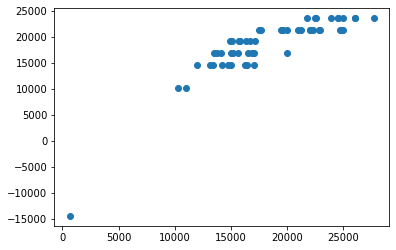

In [343]:
plt.scatter(x=y_test, y=y_pred)

## Segudna variable

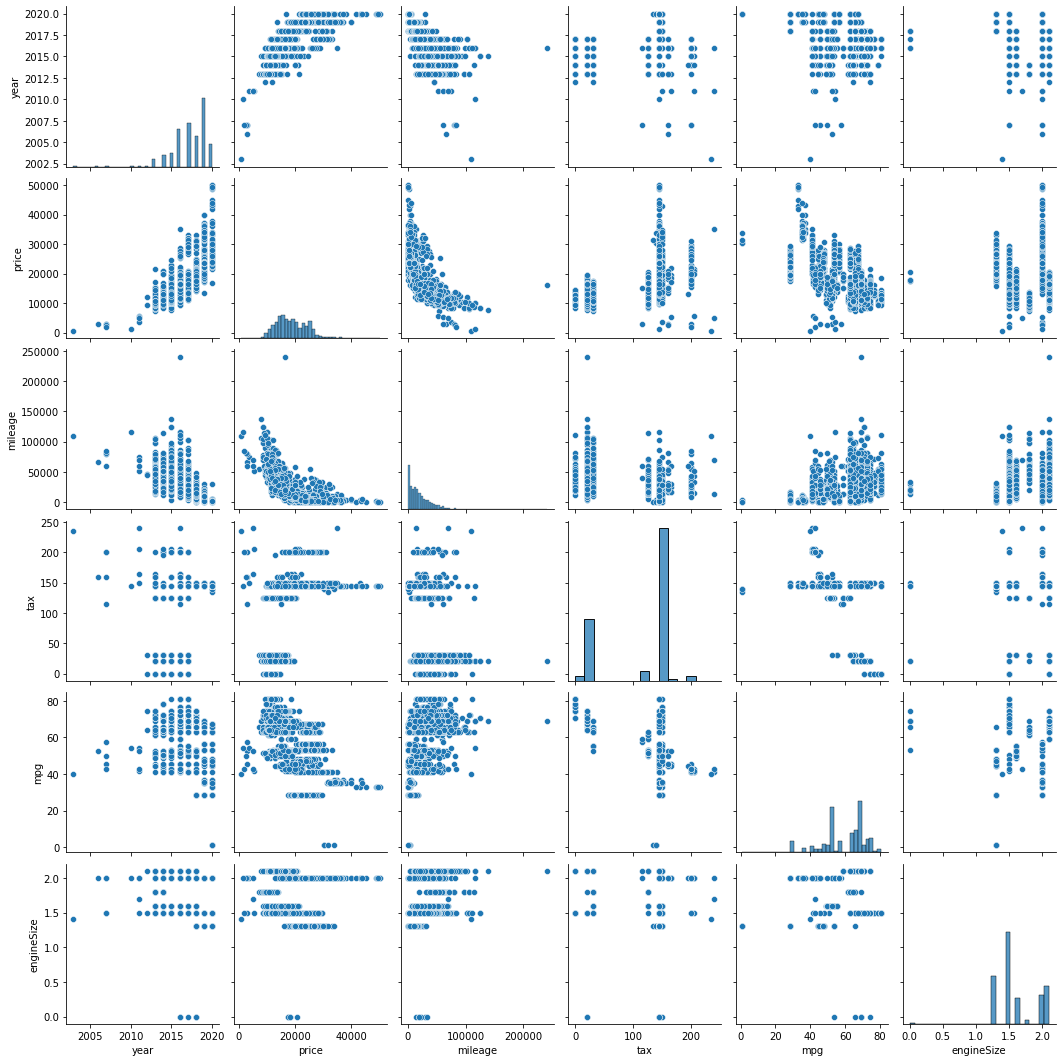

In [94]:
sns.pairplot(data=model_slctA)

Text(0, 0.5, 'Price')

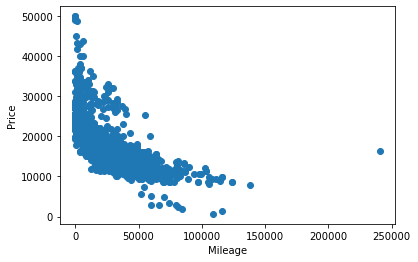

In [95]:
plt.scatter(x=model_slctA.mileage,y=model_slctA.price)
plt.xlabel('Mileage')
plt.ylabel('Price')

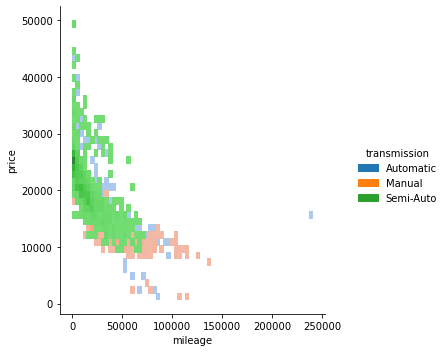

In [96]:
sns.displot(x=model_slctA.mileage,y=model_slctA.price, data=model_slctA,hue='transmission')

In [97]:
#experimento

In [271]:
def curva(x,a,b):
    return -(np.log(x) / np.log(a)) + b


In [272]:
x=model_slctA.mileage.values
y=model_slctA.price.values

In [282]:
from scipy.optimize import curve_fit
params, params_covariance = curve_fit(curva, x, y,[10,10000])

<ipython-input-271-49574620c7a8>:2: RuntimeWarning: invalid value encountered in log
  return -(np.log(x) / np.log(a)) + b


In [283]:
params

array([1.00038238e+00, 4.30680328e+04])

<ipython-input-271-49574620c7a8>:2: RuntimeWarning: divide by zero encountered in log
  return -(np.log(x) / np.log(a)) + b


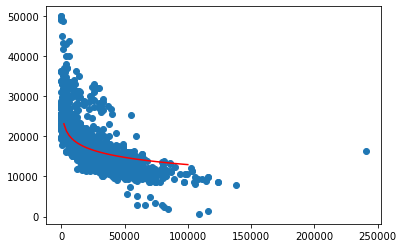

In [286]:
x_1 = np.linspace(0,100000)
plt.plot(x_1, curva(x_1, params[0],params[1]), c='red')
plt.scatter(x,y)

Observamos las diferentes variables para ver si los valores de precios altos con una distancia casi nula comparten  caracteristicas similares

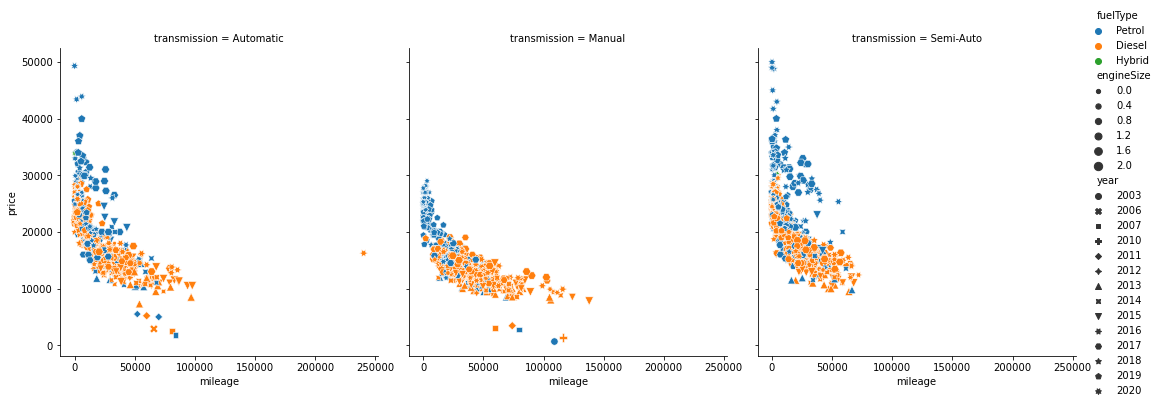

In [299]:
sns.relplot(x='mileage', y='price', hue='fuelType', col='transmission', size='engineSize',style='year', data=model_slctA)

Viendo las graficas vemos que realmente no comparten ninguna característica en concreto, por lo que el modelo no se puede aproximar más a una curva

In [ ]:
# regresion lineal del caso anterior

In [219]:
def log(x):
    return np.log(x)

In [226]:
model_slctA['milLog']=log(model_slctA.mileage)
model_slctA['PriceLog']=log(model_slctA.price)

<ipython-input-226-250d003b8601>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_slctA['milLog']=log(model_slctA.mileage)
<ipython-input-226-250d003b8601>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_slctA['PriceLog']=log(model_slctA.price)


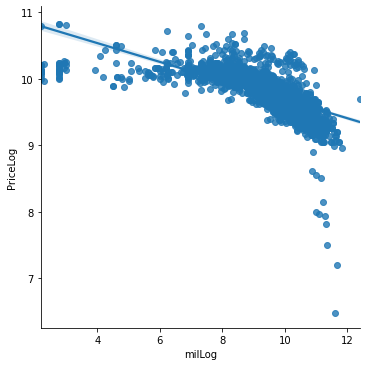

In [288]:
sns.lmplot(y='PriceLog',x='milLog',data=model_slctA)

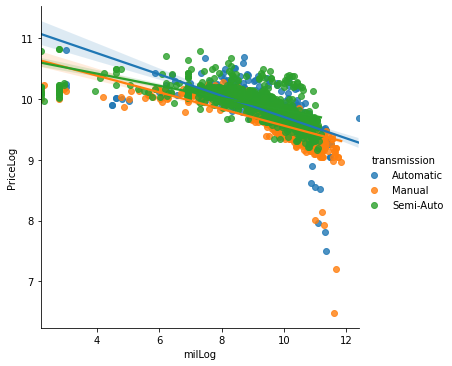

In [227]:
sns.lmplot(y='PriceLog',x='milLog',data=model_slctA, hue='transmission')

In [229]:
stats.linregress(model_slctA.milLog,model_slctA.PriceLog)

LinregressResult(slope=-0.14125370630130366, intercept=11.103737568575212, rvalue=-0.6932351626562036, pvalue=0.0, stderr=0.0029213128963772117, intercept_stderr=0.02748805944950518)

In [230]:
g1=model_slctA[model_slctA['transmission']=='Automatic']
g2=model_slctA[model_slctA['transmission']=='Manual']
g3=model_slctA[model_slctA['transmission']=='Semi-Auto']

In [231]:
stats.linregress(g1.milLog,g1.PriceLog)

LinregressResult(slope=-0.17512781483600115, intercept=11.455592320381552, rvalue=-0.6947523129235909, pvalue=1.5481639735209095e-96, stderr=0.007057200696704316, intercept_stderr=0.06718349538078704)

In [232]:
stats.linregress(g2.milLog,g2.PriceLog)

LinregressResult(slope=-0.13725805653347983, intercept=10.934570540747378, rvalue=-0.6981088519631856, pvalue=9.29436496855615e-118, stderr=0.0049864732338077925, intercept_stderr=0.0494260594248282)

In [233]:
stats.linregress(g3.milLog,g3.PriceLog)

LinregressResult(slope=-0.10011230534898038, intercept=10.819353560877952, rvalue=-0.6624255919243879, pvalue=6.963963423421654e-136, stderr=0.0034675890495505734, intercept_stderr=0.031011060185639705)

### Model

In [240]:
X=model_slctA.mileage.values
y=model_slctA.price.values

In [241]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

In [242]:
X_train= X_train.reshape(-1, 1)
y_train= y_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

In [243]:
model = LinearRegression()

In [244]:
model.fit(X_train, y_train)
model.score(X_train, y_train)

0.5179043937822718

In [245]:
y_pred = model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
rmse

3934.3937616036237

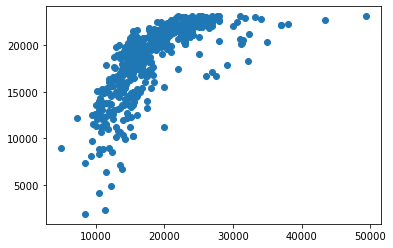

In [246]:
plt.scatter(x=y_test, y=y_pred)

## Logistic regression

In [103]:
from sklearn.linear_model import LogisticRegression

In [104]:
model_slctA.fuelType.value_counts()

Diesel    1558
Petrol     967
Hybrid       4
Name: fuelType, dtype: int64

Como logramos ver podemos descartar los datos de los coches Híbridos ya que no tenemos suficientes muestras

In [105]:
fuelType_A=model_slctA[model_slctA.fuelType!='Hybrid']

In [106]:
fuelType_A.fuelType.value_counts()

Diesel    1558
Petrol     967
Name: fuelType, dtype: int64

Dividiremos los datos en dos grupos:

    * Diesel -> 1
    * Petrol -> 0

In [107]:
fuelType_A.fuelType=fuelType_A.fuelType.map({'Diesel':1,
                        'Petrol':0},na_action=None).values

C:\Users\akram\anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


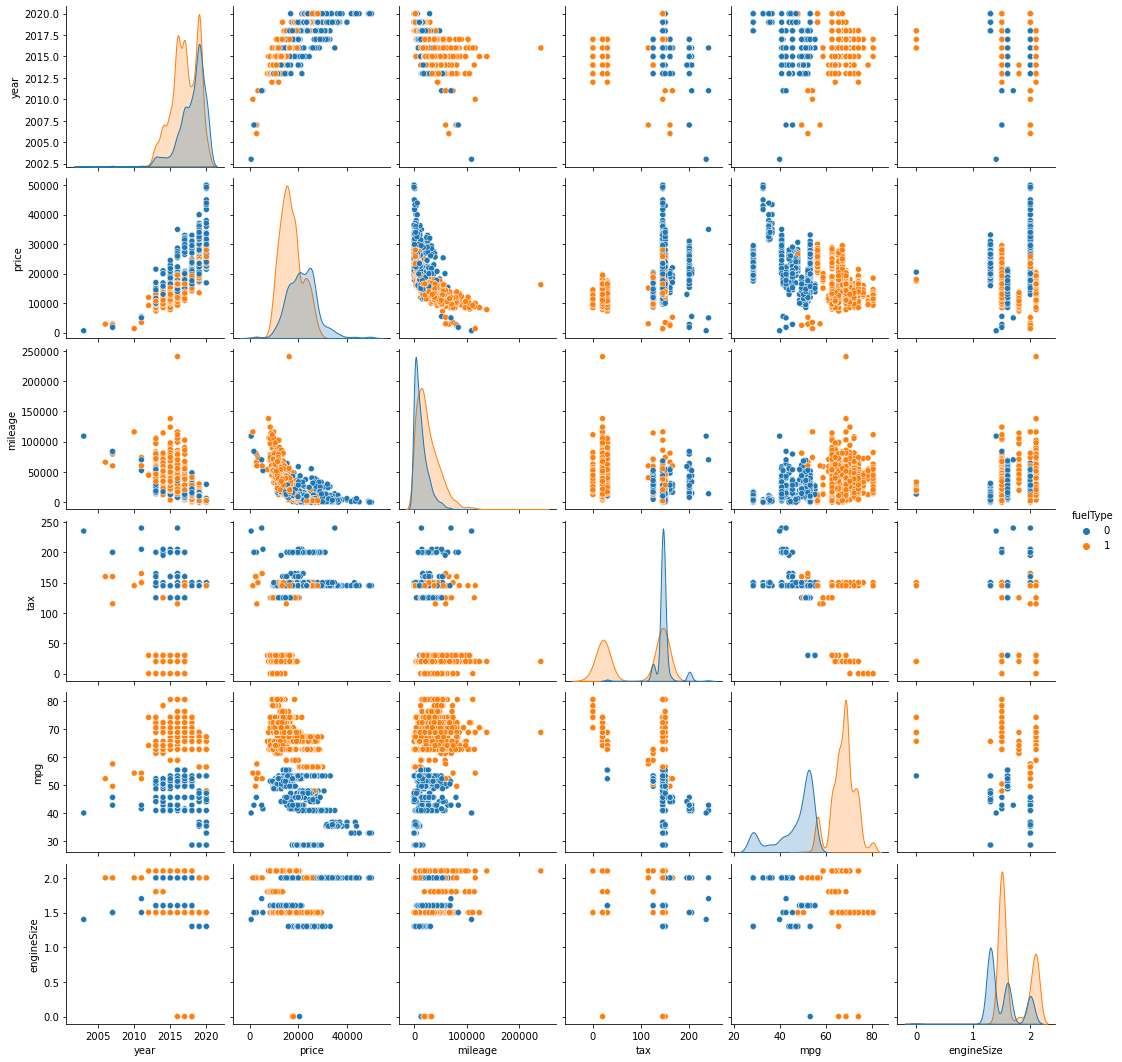

In [108]:
sns.pairplot(fuelType_A, hue='fuelType')

<AxesSubplot:xlabel='fuelType', ylabel='price'>

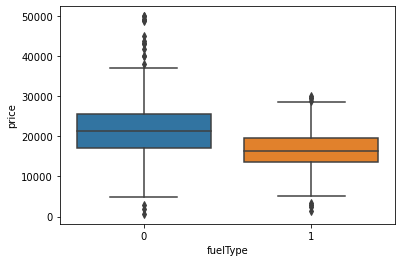

In [109]:
sns.boxplot(data=fuelType_A,x='fuelType',y='price')

<AxesSubplot:xlabel='fuelType', ylabel='price'>

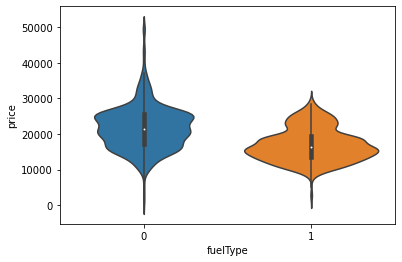

In [110]:
sns.violinplot(data=fuelType_A,x='fuelType',y='price')

In [111]:
X=fuelType_A.drop(['fuelType','model','year','transmission'],axis=1)

In [112]:
X

price  mileage  tax   mpg  engineSize
10     32980      606  145  35.8         2.0
11     26980     1000  145  62.8         1.5
33     28128     2563  145  47.9         1.3
34     23184     1173  145  44.8         1.3
35     15787    24092   20  70.6         2.1
...      ...      ...  ...   ...         ...
13053  27995     2500  145  67.3         1.5
13054  23450     2300  145  56.5         2.0
13066  23440    10124  145  53.3         1.3
13090  12995    34665   20  70.6         1.5
13109  16499    20477  145  68.9         2.1

[2525 rows x 5 columns]

In [113]:
y=fuelType_A['fuelType']

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state=42)

In [115]:
model = LogisticRegression(max_iter=1000)

In [116]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [117]:
model.score(X_test, y_test)

0.9551451187335093

C:\Users\akram\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fuelType', ylabel='count'>

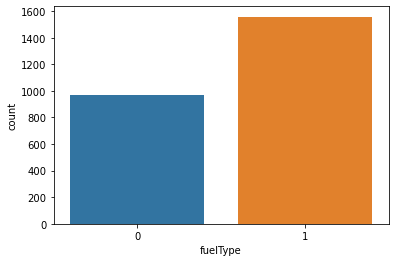

In [118]:
sns.countplot(y)

In [119]:
1 - sum(y) / len(y)

0.382970297029703

In [120]:
y_pred = model.predict(X_test)

In [121]:
y_pred

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,

In [122]:
y_test

10584    1
3866     1
1123     1
5136     1
7389     1
        ..
4588     0
8836     1
10209    1
1658     1
2118     1
Name: fuelType, Length: 379, dtype: int64

In [123]:
from sklearn.metrics import confusion_matrix, f1_score, recall_score, precision_score

In [124]:
precision_score(y_test, y_pred)

0.9775784753363229

In [125]:
recall_score(y_test, y_pred)

0.9478260869565217

In [126]:
f1_score(y_test, y_pred)

0.9624724061810154

In [127]:
confusion_matrix(y_test, y_pred)

array([[144,   5],
       [ 12, 218]], dtype=int64)

<AxesSubplot:>

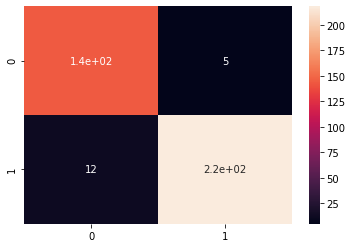

In [128]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

In [129]:
model.coef_

array([[-3.79833403e-07, -6.71307982e-05, -1.65341102e-01,
         4.27201758e-01,  4.99943906e-03]])

In [130]:
from sklearn.metrics import classification_report

In [131]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94       149
           1       0.98      0.95      0.96       230

    accuracy                           0.96       379
   macro avg       0.95      0.96      0.95       379
weighted avg       0.96      0.96      0.96       379



In [132]:
from sklearn.metrics import auc, roc_curve

In [133]:
p = model.predict_proba(X_test)

In [134]:
fpr, tpr, th = roc_curve(y_test, p[:,1])

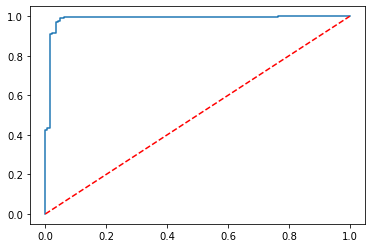

In [135]:
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1], c='r', linestyle='--')

In [136]:
auc(fpr, tpr)

0.9870440618616867

# Clastering

## K-means 

In [137]:
from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

In [138]:
cl = cluster.KMeans(n_clusters=2)

In [142]:
fuelType_A.transmission.value_counts()

Semi-Auto    1065
Manual        799
Automatic     661
Name: transmission, dtype: int64

In [ ]:
Manual -> 0
Semi-Auto -> 1
Automatic -> 2

In [143]:
fuelType_A.transmission=fuelType_A.transmission.map({'Manual':0,
                        'Semi-Auto':1,'Automatic':2},na_action=None).values

C:\Users\akram\anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [144]:
fuelType_A.head()

model  year  price  transmission  mileage  fuelType  tax   mpg  \
10   A Class  2020  32980             2      606         0  145  35.8   
11   A Class  2020  26980             2     1000         1  145  62.8   
33   A Class  2020  28128             2     2563         0  145  47.9   
34   A Class  2019  23184             0     1173         0  145  44.8   
35   A Class  2017  15787             2    24092         1   20  70.6   

    engineSize  
10         2.0  
11         1.5  
33         1.3  
34         1.3  
35         2.1

In [145]:
X=fuelType_A[['transmission','mileage','fuelType','mpg','engineSize']]

In [146]:
cl.fit(X)

KMeans(n_clusters=2)

In [147]:
clusters = cl.predict(X)

In [148]:
clusters

array([0, 0, 0, ..., 0, 1, 0])

In [151]:
fuelType_A['Kmeans']=clusters

<ipython-input-151-c22eec448ad2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fuelType_A['Kmeans']=clusters


<AxesSubplot:xlabel='Kmeans', ylabel='price'>

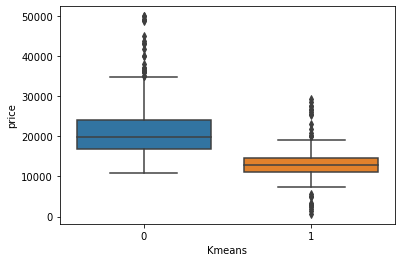

In [153]:
sns.boxplot(data=fuelType_A, x='Kmeans',y='price')

<AxesSubplot:xlabel='Kmeans', ylabel='fuelType'>

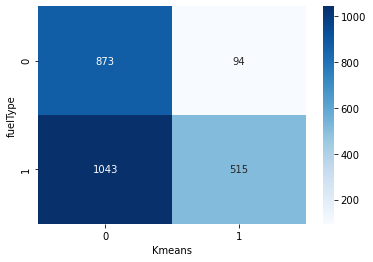

In [164]:
sns.heatmap(pd.crosstab(fuelType_A['fuelType'],fuelType_A['Kmeans']), annot=True, cmap='Blues',fmt='d')

In [248]:
8tot=873+94+1043+515

In [294]:
print(round(873/tot,2)*100,'%')
print(round(94/tot,2)*100,'%')
print(round(1043/tot,2)*100,'%')
print(round(515/tot,2)*100,'%')

35.0 %
4.0 %
41.0 %
20.0 %
